### There are times when the stock market fluctuates as the interest rate changes

This notebook looks into the relationship between the interest rate and the stock price, to see how much impact the interest rate has, on the stock market

In [1]:
import os

path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)

In [2]:
import pandas as pd
import time
import investpy
from fredapi import Fred
import json
from matplotlib import pyplot as plt
import quandl
from datetime import date
from app.utils.fetch_data import *
from app.utils.visualization import _plot_data
# from app.utils.db_connection import *

The indices we will be using for the interest rate are: `SOFR, AMERIBOR, 10y breakeven inflation rate`

In [3]:
today = date.today().strftime("%Y-%m-%d")
today

'2022-06-07'

we could go with correlation. actually the cause and effect does not matter that much here. we want to know if the inflation or interest rate has an impact on the stock price

for the individual y-variable we want to predict, it could be the S&P500 or sector etf, or individual stock

In [4]:
plot_settings = list()
start_date = '2019-01-01'

for i in ['T10YIE', 'SOFR', 'AMERIBOR']:
    time.sleep(3)
    df = fred_fred(i, observation_start = start_date, observation_end=today)
    plot_settings.append([df, 'date', 'v', i])
    
    
for i in ['S&P 500', 'S&P 500 Energy', "S&P 500 Financials", "S&P 500 Health Care", "S&P 500 Industrials", "S&P 500 Information Technology", "S&P 500 Materials",
          "S&P 500 Real Estate", "S&P 500 Telecom Services", "S&P 500 Utilities", "S&P 500 VIX"]:
    time.sleep(3)
    df = investing_api("index", i, start_date, today)
    plot_settings.append([df, 'Date', 'Close', i])

2022-06-07 00:13:20,736 [app.utils.fetch_data] [INFO] Fetching data from fred: T10YIE, from 2019-01-01 to 2022-06-07.
2022-06-07 00:13:25,182 [app.utils.fetch_data] [INFO] Fetching data from fred: SOFR, from 2019-01-01 to 2022-06-07.
2022-06-07 00:13:29,343 [app.utils.fetch_data] [INFO] Fetching data from fred: AMERIBOR, from 2019-01-01 to 2022-06-07.
2022-06-07 00:13:33,627 [app.utils.fetch_data] [INFO] Fetching index from investing_api: S&P 500, from 01/01/2019 to 07/06/2022
2022-06-07 00:13:37,121 [app.utils.fetch_data] [INFO] Fetching index from investing_api: S&P 500 Energy, from 01/01/2019 to 07/06/2022
2022-06-07 00:13:40,582 [app.utils.fetch_data] [INFO] Fetching index from investing_api: S&P 500 Financials, from 01/01/2019 to 07/06/2022
2022-06-07 00:13:44,056 [app.utils.fetch_data] [INFO] Fetching index from investing_api: S&P 500 Health Care, from 01/01/2019 to 07/06/2022
2022-06-07 00:13:47,499 [app.utils.fetch_data] [INFO] Fetching index from investing_api: S&P 500 Industr

In [42]:
fig = _plot_data('line', plot_settings)

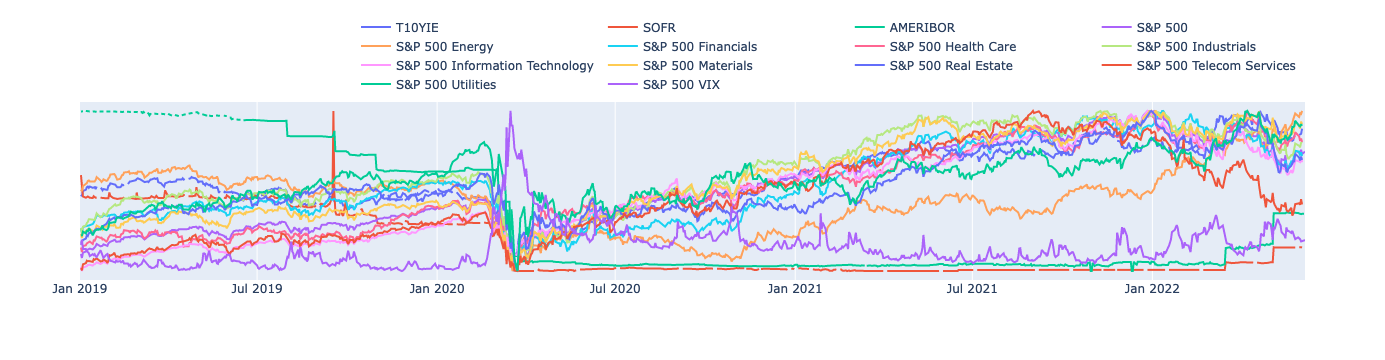

In [43]:
fig

----

In [ ]:
# fig = go.Figure()
# # fig = make_subplots(specs=[[{"secondary_y": True}]])

# df = plot_settings[0]
# fig.add_trace(go.Scatter(x=df[0][df[1]], y=df[0][df[2]], name=df[2], yaxis='y1'))

# df = plot_settings[1]
# fig.add_trace(go.Scatter(x=df[0][df[1]], y=df[0][df[2]], name=df[2], yaxis='y2'))

# df = plot_settings[5]
# fig.add_trace(go.Scatter(x=df[0][df[1]], y=df[0][df[2]], name=df[2], yaxis='y3'))

In [44]:
# fig['layout'].update({"yaxis3":{"overlaying":'y'},
#                       "yaxis2":{"overlaying":'y'}})

In [45]:
# fig